In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [69]:
zoo = pd.read_csv("D:/DataScience/regression/knn/zoo.csv")

In [70]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [71]:
zoo.shape

(101, 18)

In [72]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [73]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
type           101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


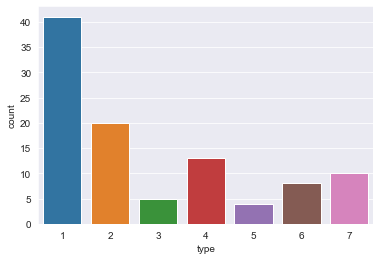

In [74]:
sb.set_style('darkgrid') 
sb.countplot(x ='type', data = zoo)

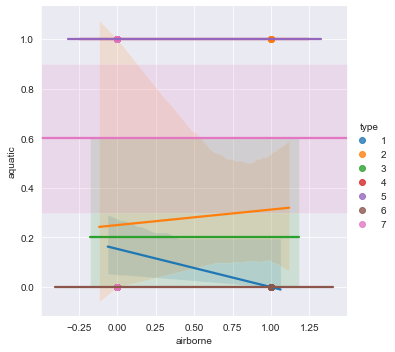

In [75]:
sb.lmplot(x = 'airborne', y = 'aquatic', hue = 'type', data = zoo)

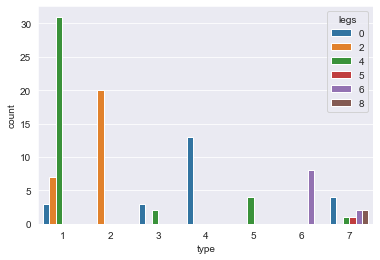

In [76]:
sb.countplot(x = "type", hue = "legs", data = zoo)

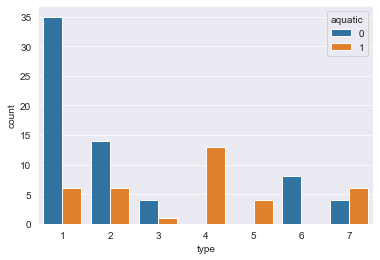

In [77]:
sb.countplot(x = "type", hue = "aquatic", data = zoo)

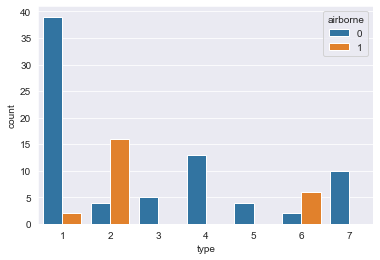

In [78]:
sb.countplot(x = "type", hue = "airborne", data = zoo)

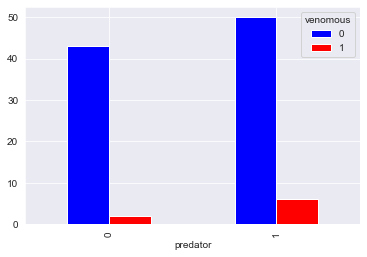

In [79]:
pd.crosstab(zoo.predator,zoo.venomous).plot(kind="bar", color = {"red","blue"})

In [80]:
zoo.drop('domestic', axis = 1, inplace = True) 

In [81]:
zoo.drop('catsize', axis = 1, inplace = True) 

In [82]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1


In [83]:
y = zoo.iloc[:, 1] 
X = zoo 
X.drop('type', axis = 1, inplace = True)

In [84]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder() 
y = lb.fit_transform(y) 

In [92]:
name_new = pd.get_dummies(zoo['animal name'])
name_new.head()

,aardvark,antelope,bass,bear,boar,buffalo,calf,carp,catfish,cavy,...,tuatara,tuna,vampire,vole,vulture,wallaby,wasp,wolf,worm,wren
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
legs_new = pd.get_dummies(zoo['legs']) 
legs_new.head()

,0,2,4,5,6,8
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [97]:
X = pd.concat([X,name_new,legs_new], axis = 1)

In [98]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1


In [99]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1) 

In [100]:
from sklearn.neighbors import KNeighborsClassifier 
neighbors = []  
cv_scores = []

In [101]:
from sklearn.model_selection import cross_val_score  
# perform 10 fold cross validation  
for k in range(1, 40, 2):  
    neighbors.append(k)  
    knn = KNeighborsClassifier(n_neighbors = k)  
    scores = cross_val_score(  
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')  
    cv_scores.append(scores.mean()) 
error_rate = [1-x for x in cv_scores]  

In [102]:
# determining the best k  
optimal_k = neighbors[error_rate.index(min(error_rate))]  
print('The optimal number of neighbors is % d ' % optimal_k)  

The optimal number of neighbors is  1 


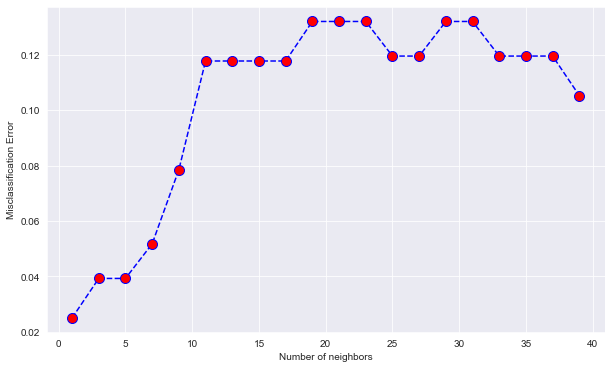

In [103]:
# plot misclassification error versus k  
plt.figure(figsize = (10, 6))  
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
plt.xlabel('Number of neighbors')  
plt.ylabel('Misclassification Error')  
plt.show() 

In [104]:

from sklearn.model_selection import cross_val_predict, cross_val_score 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix 
  
def print_score(clf, X_train, y_train, X_test, y_test, train = True): 
    if train: 
        print("Train Result:") 
        print("------------") 
        print("Classification Report: \n {}\n".format(classification_report( 
                y_train, clf.predict(X_train)))) 
        print("Confusion Matrix: \n {}\n".format(confusion_matrix( 
                y_train, clf.predict(X_train)))) 
  
        res = cross_val_score(clf, X_train, y_train,  
                              cv = 10, scoring ='accuracy') 
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res))) 
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res))) 
        print("accuracy score: {0:.4f}\n".format(accuracy_score( 
                y_train, clf.predict(X_train)))) 
        print("----------------------------------------------------------") 
                 
    elif train == False: 
        print("Test Result:") 
        print("-----------") 
        print("Classification Report: \n {}\n".format( 
                classification_report(y_test, clf.predict(X_test)))) 
        print("Confusion Matrix: \n {}\n".format( 
                confusion_matrix(y_test, clf.predict(X_test))))  
        print("accuracy score: {0:.4f}\n".format( 
                accuracy_score(y_test, clf.predict(X_test)))) 
        print("-----------------------------------------------------------") 
          
knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(X_train, y_train) 
print_score(knn, X_train, y_train, X_test, y_test, train = True) 
print_score(knn, X_train, y_train, X_test, y_test, train = False) 


Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        45
           1       1.00      0.90      0.95        30

    accuracy                           0.96        75
   macro avg       0.97      0.95      0.96        75
weighted avg       0.96      0.96      0.96        75


Confusion Matrix: 
 [[45  0]
 [ 3 27]]

Average Accuracy: 	 0.9482
Accuracy SD: 		 0.0847
accuracy score: 0.9600

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.85      0.92        13

    accuracy                           0.92        26
   macro avg       0.93      0.92      0.92        26
weighted avg       0.93      0.92      0.92        26


Confusion Matrix: 
 [[13  0]
 [ 2 11]]

accuracy score: 0.9231

-----